<a href="https://colab.research.google.com/github/ppieters/Spoon-Knife/blob/master/law_of_large_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Law of Large Numbers

*Leandro Mineti*

*Last edit: January 2019*

### TLDR

- The law of large numbers describes the result of performing the same experiment a large number of times.
- There is a strong and a weak version of the law.

## Introduction

Everyone who studies probability come across at least two limit theorems: the Law of Large Numbers and the Central Limit Theorem. The law of large numbers describes the result of performing the same experiment a large number of times. It is pervasive in probability and has many applications, like gambling and risk management. 


## Examples

Let's simulate the two usual suspects when coming up with examples in probability: coin and dice. 

### Coin toss

Let's plot the frequency of heads over 1000 coin tosses.

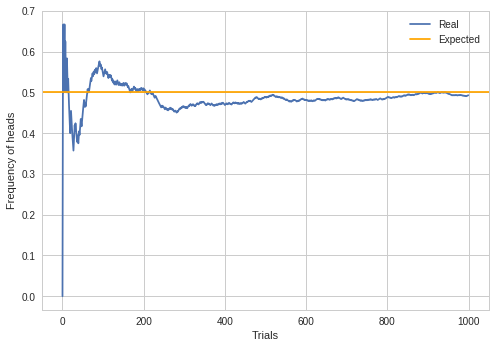

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(51)

# Generate 1000 tosses
coin = np.random.randint(0, 2, 1000)

# Heads mean
heads_mean = [np.mean(coin[:i+1]) for i, a in enumerate(coin)]

# Plot
sns.set_style("whitegrid")
plt.plot(heads_mean)
plt.axhline(0.5, color = 'orange')
plt.xlabel('Trials')
plt.ylabel('Frequency of heads')
plt.legend(('Real', 'Expected'), loc='upper right')
plt.show();

###  Throwing dice

Let's plot the frequency of '6's when throwing a dice a thousand times.

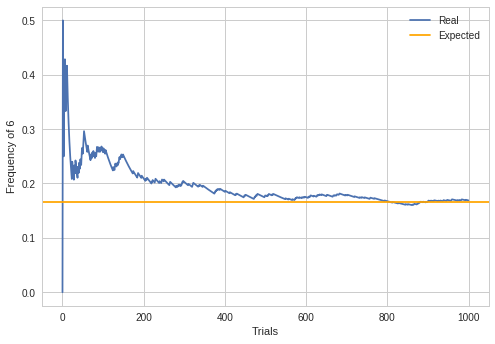

In [0]:
np.random.seed(51)

# Generate 1000 throws
dice = np.random.randint(1, 7, 1000)

# Get times where dice equals six
six = [1 if x==6 else 0 for x in dice]

# Mean
six_mean = [np.mean(six[:i+1]) for i, a in enumerate(six)]

# Plot
plt.plot(six_mean)
plt.axhline(1/6, color = 'orange')
plt.xlabel('Trials')
plt.ylabel('Frequency of 6')
plt.legend(('Real', 'Expected'), loc='upper right')
plt.show();

### Confusion

Sometimes, you may hear that the law of large numbers indicates that the number of tails and heads in coin tosses will get closer as the number of trials increases. This is not the correct interpretation, and we can show it experimentally. Let's plot the difference in the number of heads and tails over 1000 tosses.


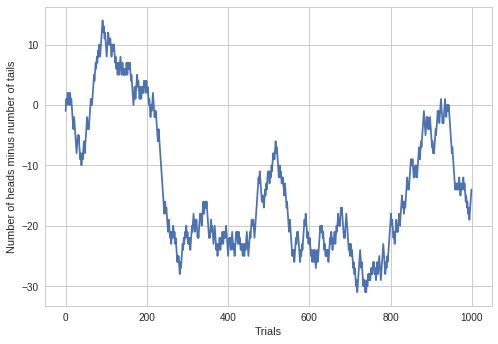

In [0]:
np.random.seed(51)

# Generate 1000 tosses
coin = np.random.randint(0, 2, 1000)

# Measure difference
diff = [2*np.sum(coin[:i+1]) - (i+1) for i, a in enumerate(coin)]

# Plot
plt.plot(diff)
plt.xlabel('Trials')
plt.ylabel('Number of heads minus number of tails');

As far as we can tell, this series is not converging to any particular value. Other common confusion is thinking that the coin has some kind of  "memory" and if a lot a tails already came up the probability of heads is higher, this is known as the [gambler's fallacy](https://en.wikipedia.org/wiki/Gambler%27s_fallacy). 

## Mathematical treatment

### Convergence in probability

As defined by DeGroot [1], a sequence of random variables $X_1, X_2, ...$ converges in probability to b if for every number $\epsilon > 0$,

$$\underset{n \rightarrow \infty}{lim} P(|X_n-b|<\epsilon) = 1$$

also written as:

$$X_n \overset{p}{\rightarrow}b$$

Based on this definition, the law of large numbers states that the sample average converges in probability towards the expected value [2]:

$$\bar{X_n}\overset{p}{\rightarrow}\mu$$ 

when $n\rightarrow \infty$. This is known as the **weak law of large numbers**. The convergence in probability is one of the ways we can define the convergence of a sequence of random variables [3]. The **strong law of large numbers** states that the sample average converges almost surely to the expected value [2]. The proof of the strong law is beyond the scope of this notebook. If you are interested in it, Terence Tao has a nice exposition in his [blog](https://terrytao.wordpress.com/2008/06/18/the-strong-law-of-large-numbers/) [4].

### Proof of the weak law of large numbers

Let's assume that the variance for all $X_i$ is $V(X_i) = \sigma^2$. Considering the samples are i.i.d, we have that:

$$
\begin{align}
V(\bar{X_n}) &= V(\frac{1}{n}(X_1+X_2+...+X_n)) \\
V(\bar{X_n}) &= \frac{1}{n^2}V(X_1 + X_2 + ... + X_n) \\
V(\bar{X_n}) &= \frac{n\sigma^2}{n^2} = \frac{\sigma^2}{n}
\end{align}
$$

We know that:

$$E(\bar{X_n}) = \mu$$

By applying the Chebyshev's inequality on $\bar{X_n}$, we get

$$P(|\bar{X_n} - \mu|\geq \epsilon) \leq \frac{\sigma^2}{n\epsilon^2}$$

Defining the complement of the above probability, we have:

$$ 
\begin{align}
P(|\bar{X_n} - \mu|<\epsilon) &= 1 - P(|\bar{X_n} - \mu|\geq \epsilon) \\
P(|\bar{X_n} - \mu|<\epsilon) &= 1 - \frac{\sigma^2}{n\epsilon^2}
\end{align}
$$

Assessing the limit of this expression when $n \rightarrow \infty$, we obtain:

$$\bar{X_n} \overset{p}{\rightarrow} \mu$$

## References

[1] DeGroot, M. H., & Schervish, M. J. (2012). Probability and statistics. Pearson Education.

[2] Loève, M. (1977). Probability theory. 1977.

[3] Convergence of random variables. (2018). In Wikipedia. Retrieved from https://en.wikipedia.org/w/index.php?title=Convergence_of_random_variables&oldid=875521080

[4] The strong law of large numbers. (2008, June 19). Retrieved January 4, 2019, from https://terrytao.wordpress.com/2008/06/18/the-strong-law-of-large-numbers/
